In [1]:
#imports libraries
import pandas as pd
import numpy as np
import re

In [2]:
# loads uniprot csv file 
uniprot = pd.read_csv('data/uniprot.csv',sep=';')

# filtering selected columns
df = uniprot[['Entry', 'Protein names','Subcellular location [CC]','Gene ontology (cellular component)']].copy()

# creates new column with NaN values
df['uniprot'] = np.nan

# extracting informations from 'Subcellular location [CC]' column
df.loc[df['Subcellular location [CC]'].isnull(), 'uniprot'] = 'N'
df.loc[df['Subcellular location [CC]'].str.contains('Cytoplasm', na=False), 'uniprot'] = 'C'
df.loc[df['Subcellular location [CC]'].str.contains('Periplasm', na = False),'uniprot'] = 'PP'
df.loc[df['Subcellular location [CC]'].str.contains('Cell inner membrane', na = False),'uniprot'] = 'IM'
df.loc[df['Subcellular location [CC]'].str.contains('Cell outer membrane', na = False),'uniprot'] = 'OM'
df.loc[df['Subcellular location [CC]'].str.contains('Cell membrane', na = False),'uniprot'] = 'MEMBR'
df.loc[df['Subcellular location [CC]'].str.contains('Membrane', na = False),'uniprot'] = 'MEMBR'
df.loc[df['Subcellular location [CC]'].str.contains('flagellum', na = False),'uniprot'] = 'FLAG'
df.loc[df['Subcellular location [CC]'].str.contains('Secreted', na = False),'uniprot'] = 'EC'

# extracting informations also from gene ontology
df.loc[(df['Gene ontology (cellular component)'].str.contains('plasma membrane', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'IM (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('outer membrane', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'OM (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('membrane', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'MEMBR (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('integral component of membrane', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'MEMBR (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('cytoplasm', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'C (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('periplasmic space', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'PP (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('pilus', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'FLAG (GO)'
df.loc[(df['Gene ontology (cellular component)'].str.contains('ribosom', na = False)) & \
       (df['uniprot'] == 'N'),'uniprot'] = 'C (GO)'

# checks if there is any protein deleted from uniprot
df.loc[df['Protein names'].str.contains('Deleted'),'uniprot'] = 'deleted'

# prints categories with number of proteins
no_category = df['uniprot'].isnull().sum()
print(f'Number of proteins without category: {no_category}')
print(df['uniprot'].value_counts())

# makes a simple bar plot
print('\n\n',df['uniprot'].value_counts().plot(kind='bar'))

# print first 5 lines of dataframe
df.head()

Number of proteins without category: 0
N             2795
MEMBR (GO)     542
C              387
IM             236
IM (GO)        108
MEMBR          103
C (GO)          81
OM (GO)         41
OM              41
PP              33
FLAG (GO)       22
FLAG            17
PP (GO)         10
EC               5
Name: uniprot, dtype: int64


 AxesSubplot(0.125,0.11;0.775x0.77)


,Entry,Protein names,Subcellular location [CC],Gene ontology (cellular component),uniprot
0,A7MGT7,Outer membrane protein assembly factor BamA,SUBCELLULAR LOCATION: Cell outer membrane {ECO...,cell outer membrane [GO:0009279]; integral com...,OM
1,A7MN76,Beta-galactosidase (Beta-gal) (EC 3.2.1.23) (L...,NaN,beta-galactosidase complex [GO:0009341],N
2,A7MNR4,Arginine repressor,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000255|H...,cytoplasm [GO:0005737],C
3,A7MMX2,ATP synthase subunit delta (ATP synthase F(1) ...,SUBCELLULAR LOCATION: Cell inner membrane {ECO...,plasma membrane [GO:0005886]; proton-transport...,IM
4,A7MIB2,"Bis(5'-nucleosyl)-tetraphosphatase, symmetrica...",NaN,NaN,N


Number of proteins without category: 0
C     2787
IM     798
PP     568
OM     150
EC     118
Name: cello, dtype: int64


 AxesSubplot(0.125,0.125;0.775x0.755)


,Entry,Protein names,Subcellular location [CC],Gene ontology (cellular component),uniprot,cello
0,A7MGT7,Outer membrane protein assembly factor BamA,SUBCELLULAR LOCATION: Cell outer membrane {ECO...,cell outer membrane [GO:0009279]; integral com...,OM,OM
1,A7MN76,Beta-galactosidase (Beta-gal) (EC 3.2.1.23) (L...,NaN,beta-galactosidase complex [GO:0009341],N,C
2,A7MNR4,Arginine repressor,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000255|H...,cytoplasm [GO:0005737],C,C
3,A7MMX2,ATP synthase subunit delta (ATP synthase F(1) ...,SUBCELLULAR LOCATION: Cell inner membrane {ECO...,plasma membrane [GO:0005886]; proton-transport...,IM,C
4,A7MIB2,"Bis(5'-nucleosyl)-tetraphosphatase, symmetrica...",NaN,NaN,N,C


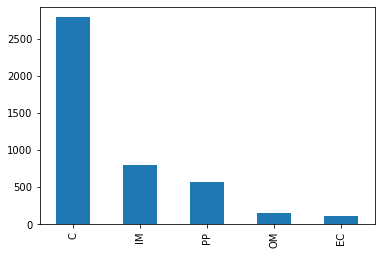

In [3]:
# loads cello tab-seperated file
cello = pd.read_csv('data/cello_results.txt', sep='\t')

# renames columns fo convenience
cello.columns=('SeqNO.',
                         'Comp.Result', 
                         'Di-pep.Result',
                         'part-Comp.Result',
                         'chemo-type.Result',
                         'Neighbor',
                         'Combined:',
                         'extra',
                         'outer',
                         'peri',
                         'inner',
                         'cyto',
                         'Most-likely-Location',
                         'SeqName')

# creates a new column with NaN values
df['cello'] = np.nan

# extracting informations about location in cell
df.loc[cello['Most-likely-Location'].str.contains('Cytoplasmic', na = False),'cello'] = 'C'
df.loc[cello['Most-likely-Location'].str.contains('Extracellular', na = False),'cello'] = 'EC'
df.loc[cello['Most-likely-Location'].str.contains('Periplasmic', na = False),'cello'] = 'PP'
df.loc[cello['Most-likely-Location'].str.contains('OuterMembrane', na = False),'cello'] = 'OM'
df.loc[cello['Most-likely-Location'].str.contains('InnerMembrane', na = False),'cello'] = 'IM'

# prints categories with number of proteins
no_category = df['cello'].isnull().sum()
print(f'Number of proteins without category: {no_category}')
print(df['cello'].value_counts())

# makes a simple bar plot
print('\n\n',df['cello'].value_counts().plot(kind='bar'))

# print first 5 lines of dataframe
df.head()

Number of proteins without category: 0
C        1797
N        1205
IM       1032
PP        150
MULTI      98
OM         85
EC         54
Name: psort, dtype: int64


 AxesSubplot(0.125,0.125;0.775x0.755)


,Entry,Protein names,Subcellular location [CC],Gene ontology (cellular component),uniprot,cello,psort
0,A7MGT7,Outer membrane protein assembly factor BamA,SUBCELLULAR LOCATION: Cell outer membrane {ECO...,cell outer membrane [GO:0009279]; integral com...,OM,OM,OM
1,A7MN76,Beta-galactosidase (Beta-gal) (EC 3.2.1.23) (L...,NaN,beta-galactosidase complex [GO:0009341],N,C,N
2,A7MNR4,Arginine repressor,SUBCELLULAR LOCATION: Cytoplasm {ECO:0000255|H...,cytoplasm [GO:0005737],C,C,C
3,A7MMX2,ATP synthase subunit delta (ATP synthase F(1) ...,SUBCELLULAR LOCATION: Cell inner membrane {ECO...,plasma membrane [GO:0005886]; proton-transport...,IM,C,C
4,A7MIB2,"Bis(5'-nucleosyl)-tetraphosphatase, symmetrica...",NaN,NaN,N,C,C


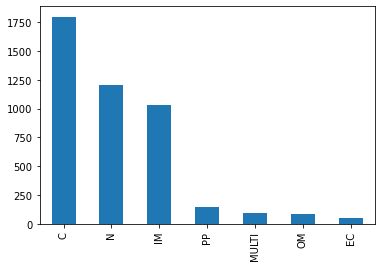

In [4]:
# load psort output file
psort = open('data/psort.txt', 'r').readlines()

# creates a new column with NaN values
df['psort'] = np.nan

# extracting informations about location in cell
j=0
for i in range(len(psort)):
    if 'Final' in psort[i]:
        if 'Cytoplasmic  ' in psort[i+1]:
            df.loc[j, 'psort'] = 'C'
        elif 'CytoplasmicMembrane' in psort[i+1]:
            df.loc[j, 'psort'] = 'IM'
        elif 'Periplasmic' in psort[i+1]:
            df.loc[j, 'psort'] = 'PP'
        elif 'Unknown' in psort[i+1] and 'multiple' not in psort[i+1]:
            df.loc[j, 'psort'] = 'N'
        elif 'Extracellular' in psort[i+1]:
            df.loc[j, 'psort'] = 'EC'
        elif 'multiple' in psort[i+1]:
            df.loc[j, 'psort'] = 'MULTI'
        elif 'OuterMembrane' in psort[i+1]:
            df.loc[j, 'psort'] = 'OM'
        j=j+1

# prints categories with number of proteins
no_category = df['psort'].isnull().sum()
print(f'Number of proteins without category: {no_category}')
print(df['psort'].value_counts())

# makes a simple bar plot
print('\n\n',df['psort'].value_counts().plot(kind='bar'))

# print first 5 lines of dataframe
df.head()

Number of proteins without category: 0
C                        1748
N                        1129
IM                        807
More attention needed     240
MEMBR                     181
PP                        136
OM                         77
FLAG                       39
MEMBR (GO)                 38
EC                         24
OM (GO)                     2
Name: cell_location, dtype: int64


,Entry,Protein names,uniprot,cello,psort,cell_location
0,A7MGT7,Outer membrane protein assembly factor BamA,OM,OM,OM,OM
1,A7MN76,Beta-galactosidase (Beta-gal) (EC 3.2.1.23) (L...,N,C,N,N
2,A7MNR4,Arginine repressor,C,C,C,C
3,A7MMX2,ATP synthase subunit delta (ATP synthase F(1) ...,IM,C,C,C
4,A7MIB2,"Bis(5'-nucleosyl)-tetraphosphatase, symmetrica...",N,C,C,C


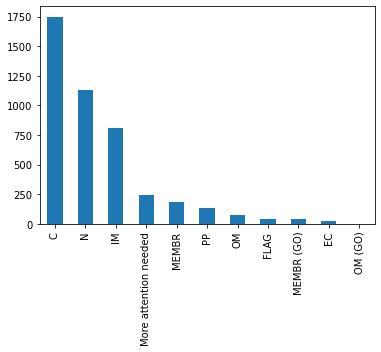

In [5]:
# creates a new column with NaN values for final cell location
df['cell_location'] = np.nan

# comparing all three predictions
all_three = 0        
for i in df.index:
    # when all conditions are the same
    if (df.loc[i, 'cello'] == df.loc[i, 'psort']) and (df.loc[i, 'cello'] in df.loc[i, 'uniprot']):
        df.loc[i, 'cell_location'] = df.loc[i, 'cello']
        all_three += 1
        # FLAG when FLAG is in uniprot
    elif re.search('FLAG', df.loc[i,'uniprot']):
            df.loc[i,'cell_location'] = 'FLAG'    
    # unkown location
    elif df.loc[i, 'uniprot'] == df.loc[i, 'psort'] == 'N':
        df.loc[i, 'cell_location'] = 'N'
    elif (df.loc[i, 'uniprot'] == 'N') and (df.loc[i, 'psort'] == 'MULTI'):
        df.loc[i, 'cell_location'] = 'N'
        
    # cello == psort
    elif np.isnan(df.loc[i, 'cell_location'])  and \
         (df.loc[i, 'cello'] == df.loc[i, 'psort']):
             df.loc[i, 'cell_location'] = df.loc[i, 'cello']
            
    # cello in uniprot
    elif np.isnan(df.loc[i, 'cell_location'])  and \
         (df.loc[i, 'cello'] in df.loc[i, 'uniprot']):
             df.loc[i, 'cell_location'] = df.loc[i, 'cello']
            
    # filter out membrane proteins
    # IM when 2 conditions meet
    elif (np.isnan(df.loc[i, 'cell_location']))  and \
         (((re.search('IM', df.loc[i, 'uniprot'])) and \
          (re.search('IM', df.loc[i, 'cello']))) or \
          ((re.search('IM', df.loc[i, 'uniprot'])) and \
          (re.search('IM', df.loc[i, 'psort']))) or \
          ((re.search('IM', df.loc[i, 'cello'])) and \
          (re.search('IM', df.loc[i, 'psort'])))):
            df.loc[i, 'cell_location'] = 'IM'
            
    # OM when 2 OM meet            
    elif (((re.search('OM', df.loc[i, 'uniprot'])) and \
          (re.search('OM', df.loc[i, 'cello']))) or \
          ((re.search('OM', df.loc[i, 'uniprot'])) and \
          (re.search('OM', df.loc[i, 'psort']))) or \
          ((re.search('OM', df.loc[i, 'cello'])) and \
          (re.search('OM', df.loc[i, 'psort'])))):
            df.loc[i, 'cell_location'] = 'OM'
            
    # PP when 2 PP meet           
    elif (np.isnan(df.loc[i, 'cell_location']))  and \
         (((re.search('PP', df.loc[i, 'uniprot'])) and \
          (re.search('PP', df.loc[i, 'cello']))) or \
          ((re.search('PP', df.loc[i, 'uniprot'])) and \
          (re.search('PP', df.loc[i, 'psort']))) or \
          ((re.search('PP', df.loc[i, 'cello'])) and \
          (re.search('PP', df.loc[i, 'psort'])))):
            df.loc[i, 'cell_location'] = 'PP'
          
    # MEMBR when is not possible to distinguish
    elif (np.isnan(df.loc[i, 'cell_location']))  and \
         (re.search('MEMBR|IM|OM|PP', df.loc[i, 'uniprot'])) and \
         (re.search('MEMBR|IM|OM|PP', df.loc[i, 'cello'])) and \
         (re.search('MEMBR|IM|OM|PP',df.loc[i, 'psort'])) and \
         (np.isnan(df.loc[i, 'cell_location'])) :
            all_three += 1
            df.loc[i, 'cell_location'] = 'MEMBR'
    
    elif (np.isnan(df.loc[i, 'cell_location']))  and \
         (re.search('MEMBR|IM|OM|PP', df.loc[i, 'uniprot'])) and \
         (re.search('IM|OM|PP', df.loc[i, 'cello'])):
            df.loc[i, 'cell_location'] = 'MEMBR'
            
    elif (np.isnan(df.loc[i, 'cell_location']))  and \
         (re.search('IM|OM|PP', df.loc[i, 'psort'])) and \
         (re.search('IM|OM|PP', df.loc[i, 'cello'])):
            df.loc[i, 'cell_location'] = 'MEMBR'
    # MEMBR when is not possible to distinguish

    elif np.isnan(df.loc[i, 'cell_location'])  and \
         (df.loc[i, 'psort'] in df.loc[i, 'uniprot']):
             df.loc[i, 'cell_location'] = df.loc[i, 'psort']            
    elif np.isnan(df.loc[i, 'cell_location'])  and \
         ('MEMBR' in df.loc[i, 'uniprot']) and \
         ((re.search('MEMBR|IM|OM|PP', df.loc[i, 'cello'])) or \
          (re.search('MEMBR|IM|OM|PP', df.loc[i, 'psort']))):
             df.loc[i, 'cell_location'] = 'MEMBR'
    elif np.isnan(df.loc[i, 'cell_location'])  and \
         ('MEMBR' in df.loc[i, 'psort']) and \
         ((re.search('MEMBR|IM|OM|PP', df.loc[i, 'uniprot'])) or \
          (re.search('MEMBR|IM|OM|PP', df.loc[i, 'psort']))):
             df.loc[i, 'cell_location'] = 'MEMBR'
    elif (np.isnan(df.loc[i, 'cell_location'])) and \
      (df.loc[i, 'uniprot'] != 'N' and df.loc[i, 'uniprot'] != 'deleted'):
              df.loc[i, 'cell_location'] = df.loc[i, 'uniprot'] 

    elif (df.loc[i, 'psort'] == 'MULTI')  and \
         (df.loc[i, 'cello'] != df.loc[i, 'uniprot']):
             df.loc[i, 'cell_location'] = 'More attention needed'
                 
    else:
        df.loc[i, 'cell_location'] = 'More attention needed'
            

# prints categories with number of proteins
no_category = df['cell_location'].isnull().sum()
print(f'Number of proteins without category: {no_category}')
print(df['cell_location'].value_counts())

# makes a simple bar plot
df['cell_location'].value_counts().plot(kind='bar')

# or pie chart alternatively
# df['cell_location'].value_counts().plot(kind='pie', title='')

#print(df[df['cell_location'] == 'More attention needed'][(df['uniprot'] != 'deleted') & (df['uniprot'] != 'N')])

df_final = df[['Entry', 'Protein names','uniprot', 'cello', 'psort', 'cell_location']].copy()
df_final.to_excel('output_data/cell_location.xlsx', index=False)

# print first 5 lines of dataframe
df_final.head()


Number of proteins without category: 0
NO                      3857
SP(Sec/SPI)              260
SP(Sec/SPI) < 0.9        131
LIPO(Sec/SPII)           101
LIPO(Sec/SPII) < 0.9      36
TAT < 0.9                 19
TAT                       17
Name: SP, dtype: int64


,Entry,Protein names,uniprot,cello,psort,cell_location,SP
0,A7MGT7,Outer membrane protein assembly factor BamA,OM,OM,OM,OM,SP(Sec/SPI)
1,A7MN76,Beta-galactosidase (Beta-gal) (EC 3.2.1.23) (L...,N,C,N,N,NO
2,A7MNR4,Arginine repressor,C,C,C,C,NO
3,A7MMX2,ATP synthase subunit delta (ATP synthase F(1) ...,IM,C,C,C,NO
4,A7MIB2,"Bis(5'-nucleosyl)-tetraphosphatase, symmetrica...",N,C,C,C,NO


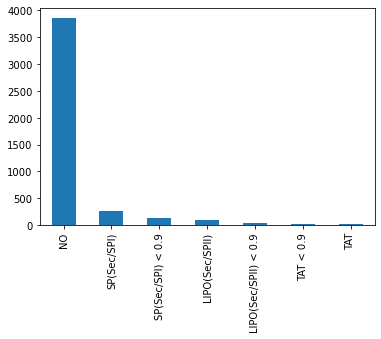

In [6]:
signalp = pd.read_csv('data/SignalP.txt', sep='\t', skiprows=1)

df_final['SP'] = np.nan

df_final.loc[signalp['Prediction'].str.contains('OTHER', na = False),'SP'] = 'NO'
df_final.loc[(signalp['Prediction'].str.contains('SP\(Sec/SPI\)' , na = False)) & \
             (signalp['SP(Sec/SPI)'] >= 0.9), 'SP'] = 'SP(Sec/SPI)'
df_final.loc[(signalp['Prediction'].str.contains('SP\(Sec/SPI\)' , na = False)) & \
             (signalp['SP(Sec/SPI)'] < 0.9), 'SP'] = 'SP(Sec/SPI) < 0.9'
df_final.loc[(signalp['Prediction'].str.contains('LIPO\(Sec/SPII\)', na = False)) & \
             (signalp['LIPO(Sec/SPII)'] >= 0.9),'SP'] = 'LIPO(Sec/SPII)'
df_final.loc[(signalp['Prediction'].str.contains('LIPO\(Sec/SPII\)', na = False)) & \
             (signalp['LIPO(Sec/SPII)'] < 0.9),'SP'] = 'LIPO(Sec/SPII) < 0.9'
df_final.loc[(signalp['Prediction'].str.contains('TAT', na = False)) & \
            (signalp['TAT(Tat/SPI)'] >= 0.9),'SP'] = 'TAT'
df_final.loc[(signalp['Prediction'].str.contains('TAT', na = False)) & \
            (signalp['TAT(Tat/SPI)'] < 0.9),'SP'] = 'TAT < 0.9'

df_final['SP'].value_counts().plot(kind='bar')
# prediction_uniprot.loc[prediction_signalp['Prediction'].str.contains(
#     'OTHER', na = False),'SP'] = 'No'

no_category = df_final['SP'].isnull().sum()
print(f'Number of proteins without category: {no_category}')
print(df_final['SP'].value_counts())

df_final.to_excel('output_data/cell_location.xlsx', index=False)
df_final.head()

,Entry,Protein names,uniprot,cello,psort,cell_location,SP,predicted transmembrane helices
0,A7MGT7,Outer membrane protein assembly factor BamA,OM,OM,OM,OM,SP(Sec/SPI),0
1,A7MN76,Beta-galactosidase (Beta-gal) (EC 3.2.1.23) (L...,N,C,N,N,NO,0
2,A7MNR4,Arginine repressor,C,C,C,C,NO,0
3,A7MMX2,ATP synthase subunit delta (ATP synthase F(1) ...,IM,C,C,C,NO,0
4,A7MIB2,"Bis(5'-nucleosyl)-tetraphosphatase, symmetrica...",N,C,C,C,NO,0


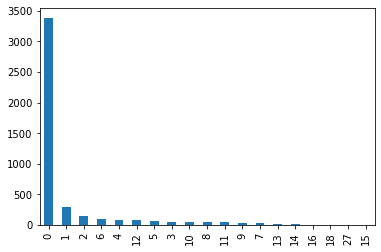

In [7]:
tmhmm = pd.read_csv('data/TMHMM.txt', header = None, sep='\t')
df_final['predicted transmembrane helices'] = tmhmm[4].apply(lambda x: x.split(sep='=')[1])
df_final['predicted transmembrane helices'].value_counts().plot(kind='bar')
df_final.to_excel('output_data/cell_location.xlsx', index=False)

df_final.head()